# Boston Housing Dataset

## About the Dataset

The Boston Housing Dataset contains information collected by the US Census Service in 1970 on various house prices in the area of Boston. The dataset is small in size with only 506 samples and 14 variables. The data gives values for various features of different suburbs of Boston as well as the median-value for homes in each suburb. The features were chosen to reflect various aspects believed to influence houses prices including the structure of the house (age and spaciousness), the quality of the neighborhood, transportation access to employment centers and highways, and pollution.

## Objective

The goals of this assessment are as follows:
 - describe the dataset using descriptive statistics and plots.
 - use inferential statistics to determine whether there is a significant difference in median house prices between houses that    are along the Charles river and those that are not.
 - use keras to create a neural network that can predict the medium house price based on the other variables in the dataset.



## Python Libraries

Python has a large number of libraries which makes it a powerful programming language for analysing data. The libraries that were imported and used in this project were NumPy, Pandas, Matplotlib, Seaborn, Sklearn, Scipy and Keras. 

 - NumPy - an array processing package.
 - Pandas - a data processing library which provides tools for shaping, merging, reshaping, and slicing data sets.
 - Matplotlib - a graphing library to create 2D plots and graphs on a variety of data formats.
 - Seaborn library - a plotting and styling library.
 - Scikit-learn is a library that provides many unsupervised and supervised learning algorithms.
 - SciPy is a library that uses NumPy for more mathematical functions.
 - Keras is an open-source neural-network library written in Python.

In [62]:
# for generating random variables
import numpy as np

# for plotting
import matplotlib.pyplot as plt 

# for managing data
import pandas as pd

# for plotting
import seaborn as sns 

# for t-tests and ANOVA
import scipy.stats as stats

# for learning algorithms
import sklearn

# to create a neural network
import keras as kr

# for encoding categorical variables.
import sklearn.preprocessing as pre

# for splitting into training and test sets.
import sklearn.model_selection as mod

%matplotlib inline

# to increase the size of the plots as plots are too small otherwise
plt.rcParams['figure.figsize'] = (20.0, 10.0)

## Load the dataset

The Boston Housing dataset can be accessed through the scikit-learn library. The dataset can be directly imported from the scikit-learn library rather than downloading the csv file from an external website. The Boston dataset is made of 506 rows and 14 columns. It is a relatively small, clean and well-known dataset used for machine learning projects.

In [63]:
# load the dataset from the scikit-learn library

from sklearn.datasets import load_boston
boston_dataset = load_boston()

In [64]:
# print the shape of the dataset and a description of the variables. This shows 506 samples, 14 variables and no missing values.

print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## Create a Panda's Dataframe

The data from the Boston dataset is transferred to a Panda's dataframe to carry out descriptive statistics on the dataset. A Panda's dataframe is a table structure with labelled rows and columns.

In [65]:
# load data into dataframe and print the first 5 rows of data
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
# Print first 5 rows
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [66]:
# Median value is a missing variable - the target variable - this needs to be added to the dataframe 
boston['MEDV'] = boston_dataset.target
# Print first 5 rows
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [67]:
# check for any missing values in the dataset - a clean dataset is required for analysis
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

As we can see there are no missing values in the boston dataset.

In [68]:
# rename the variables to the full variable name to avoid confusion
boston.columns = ['crime_rate', 'large_zones', 'industrial', 'charles_river', 'nitric_oxide', 'rooms', 'old_houses', 'distance', 'highway_access', 'property_tax', 'pupil_teacher_ratio', 'proportion_blacks', 'lower_status', 'median_value']
# print first 5 rows
boston.head()

,crime_rate,large_zones,industrial,charles_river,nitric_oxide,rooms,old_houses,distance,highway_access,property_tax,pupil_teacher_ratio,proportion_blacks,lower_status,median_value
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Descriptive Statistics

Now that the dataset has been loaded into a Panda's dataframe and the missing variable MEDV has been added, I will analyse the dataset to learn more about what it contains.
The Panda's describe function produces the descriptive statistics on the dataset. The mean, standard deviation, maximum number, minimum number, 25% quartile range (median), 50% quartile range and 75% quartile range are produced for each of the 14 variables.

In [69]:
# descriptive statistics are obtained using the describe function. Adding the .T swaps the rows and columns.
boston.describe().T

,count,mean,std,min,25%,50%,75%,max
crime_rate,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
large_zones,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
industrial,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
charles_river,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
nitric_oxide,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
rooms,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
old_houses,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
distance,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
highway_access,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
property_tax,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


It is difficult to obtain a clear picture of the dataset using the basic raw descriptive statistics - it is not very informative in this state. Visualisation tools provide a much better way to analyse the dataset and will give a better understanding of the data.

## Visualisations

The raw descriptive statistics gave all the relevant information on each of the variables in the dataset, however using visual tools such as histograms, boxplots and scatterplots make it easier to visualise the distribution of each of the 14 variables.

Using the Seaborn library I will plot the distribution of the target variable median_value using the histogram and boxplot functions. This target variable is the median-value of houses within a given suburb in $1'000's. I will also use the pairplot function in seaborn to visualise the distribution for crime_rate, rooms, pupil_teacher_ratio, lower_status and distance.

I will then calculate the correlation between variables using the corr function in Pandas and plot a heatmap using the Seaborn plotting library.

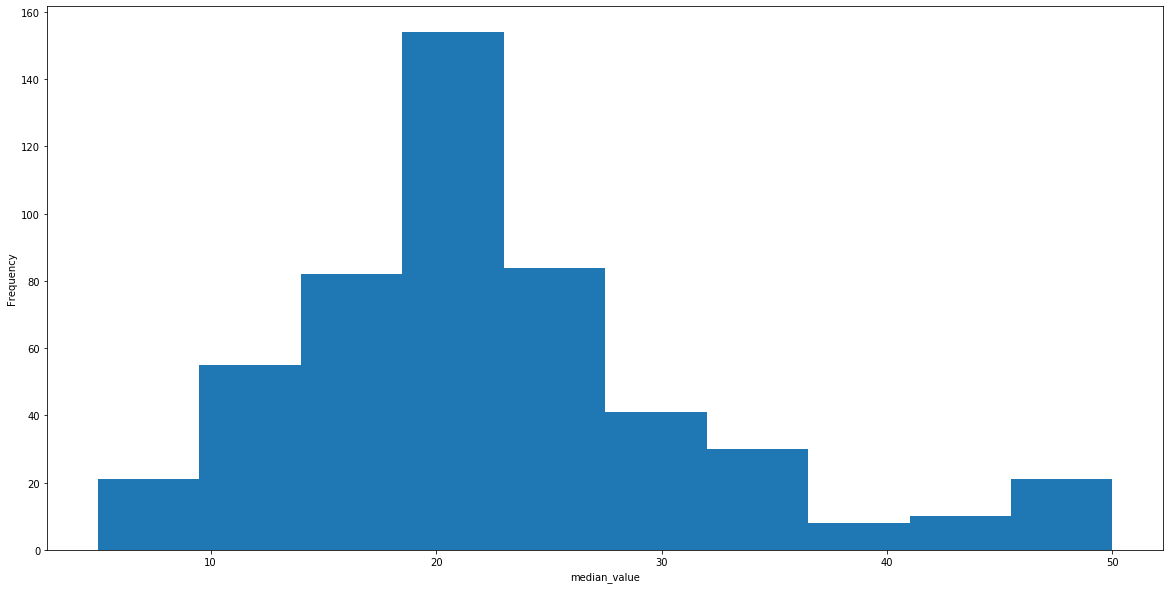

In [70]:
# create a histogram on the 'median_value'
plt.hist(boston['median_value'])
plt.xlabel("median_value")
plt.ylabel("Frequency")
plt.show()

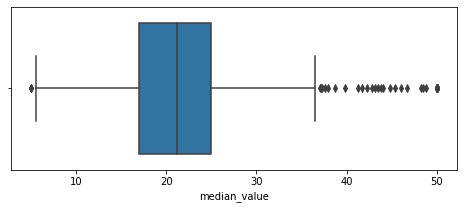

In [71]:
# create a boxplot on variable 'median_value'
plt.figure(figsize=(8,3))
sns.boxplot(boston['median_value'])

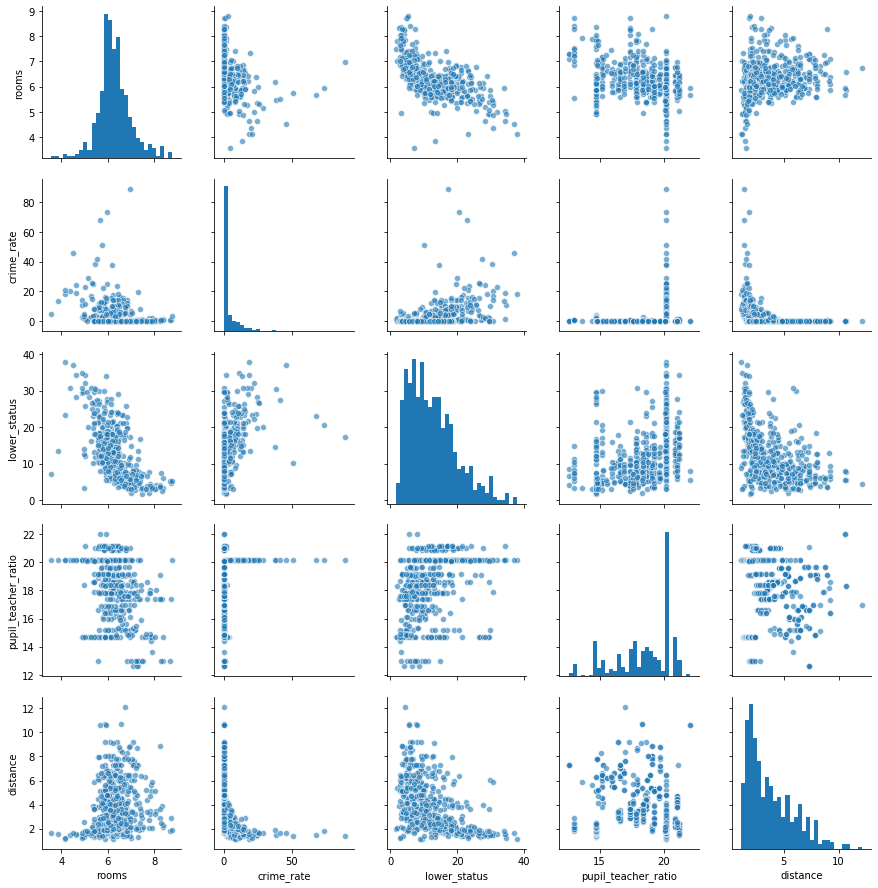

In [72]:
# create a variable called cols with list of variables
cols = ['rooms', 'crime_rate', 'lower_status', 'pupil_teacher_ratio', 'distance']

# create pairplots on the list of variables in cols
sns.pairplot(boston[cols],
plot_kws={'alpha': 0.6},
diag_kws={'bins': 30})

plt.show()

### Overview of Visualisation:

Looking at the distribution on the histogram for the median_value it shows a distribution that is skewed right with several outliers. This means it is not normally distributed around the mean, but distributed slightly below the mean. The values are centred around approximately 22,000 and the minimum value is 5,000 and maximum value is 50,000.The boxplot shows a symmetric distribution with one outlier to the left and several to the right.The range of the distribution is 45,000.

Lower_status, crime_rate and distance are skewed right and rooms has the closest shape to a normal distribution

## Correlation

Finding the correlation between variables is a useful way to check for patterns in the dataset. To find the correlation between variables the Pandas .corr() function can be used. The output of each of these correlation functions will fall within the range -1 to +1. 1 indicates variables are positively correlated, -1 indicates variables are negatively correlated and 0 indicates variables are not correlated.
The Pearson correlation coefficient measures the linear relationship between two datasets and requires that each dataset should be normally distributed. The Spearman correlation coefficient is based on the ranked values for each variable rather than the raw data and does not require variables to be normally distributed. As the variables I closely examined are non-normal I will use the Spearman rank correlation coefficient. This will ensure that any relationships between variables are viable.
I am going to calculate the Spearman coefficient on the variables to see what relationships can be found. I will be looking more closely at the relationships with the target value with a value higher than 0.54.

In [73]:
# run the Panda's corr function on the boston dataframe - method Pearson
boston.corr(method='spearman')

,crime_rate,large_zones,industrial,charles_river,nitric_oxide,rooms,old_houses,distance,highway_access,property_tax,pupil_teacher_ratio,proportion_blacks,lower_status,median_value
crime_rate,1.000000,-0.571660,0.735524,0.041537,0.821465,-0.309116,0.704140,-0.744986,0.727807,0.729045,0.465283,-0.360555,0.634760,-0.558891
large_zones,-0.571660,1.000000,-0.642811,-0.041937,-0.634828,0.361074,-0.544423,0.614627,-0.278767,-0.371394,-0.448475,0.163135,-0.490074,0.438179
industrial,0.735524,-0.642811,1.000000,0.089841,0.791189,-0.415301,0.679487,-0.757080,0.455507,0.664361,0.433710,-0.285840,0.638747,-0.578255
charles_river,0.041537,-0.041937,0.089841,1.000000,0.068426,0.058813,0.067792,-0.080248,0.024579,-0.044486,-0.136065,-0.039810,-0.050575,0.140612
nitric_oxide,0.821465,-0.634828,0.791189,0.068426,1.000000,-0.310344,0.795153,-0.880015,0.586429,0.649527,0.391309,-0.296662,0.636828,-0.562609
rooms,-0.309116,0.361074,-0.415301,0.058813,-0.310344,1.000000,-0.278082,0.263168,-0.107492,-0.271898,-0.312923,0.053660,-0.640832,0.633576
old_houses,0.704140,-0.544423,0.679487,0.067792,0.795153,-0.278082,1.000000,-0.801610,0.417983,0.526366,0.355384,-0.228022,0.657071,-0.547562
distance,-0.744986,0.614627,-0.757080,-0.080248,-0.880015,0.263168,-0.801610,1.000000,-0.495806,-0.574336,-0.322041,0.249595,-0.564262,0.445857
highway_access,0.727807,-0.278767,0.455507,0.024579,0.586429,-0.107492,0.417983,-0.495806,1.000000,0.704876,0.318330,-0.282533,0.394322,-0.346776
property_tax,0.729045,-0.371394,0.664361,-0.044486,0.649527,-0.271898,0.526366,-0.574336,0.704876,1.000000,0.453345,-0.329843,0.534423,-0.562411


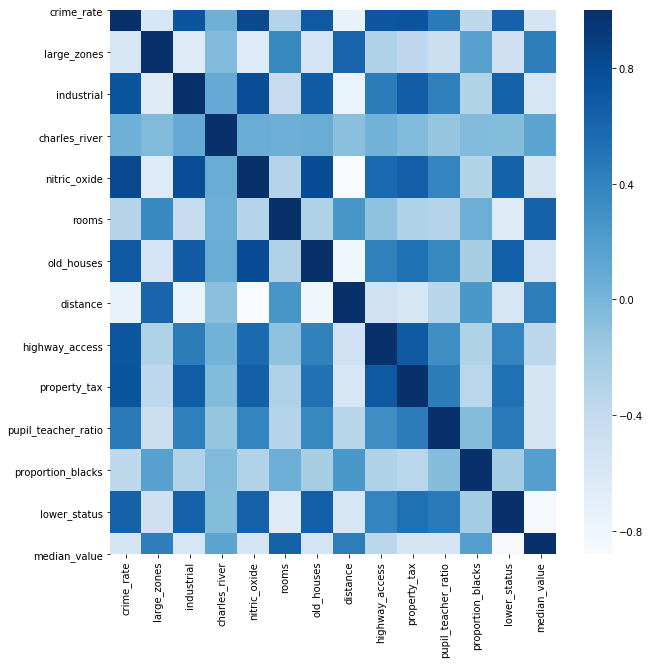

In [74]:
# using Pearson Correlation
plt.figure(figsize=(10,10))

# assign a variable cor
cor = boston.corr(method='spearman')

# create a heatmap in seaborn
sns.heatmap(cor, annot=False, cmap=plt.cm.Blues)

In [75]:
# Correlation with target variable
cor_target = abs(cor["median_value"])

# Selecting highly correlated features
relevant_features = cor_target[cor_target>0.54]
# print the features that are correlated to median_value
relevant_features

crime_rate             0.558891
industrial             0.578255
nitric_oxide           0.562609
rooms                  0.633576
old_houses             0.547562
property_tax           0.562411
pupil_teacher_ratio    0.555905
lower_status           0.852914
median_value           1.000000
Name: median_value, dtype: float64

I will look at the some of the relationships with median_value more closely by way of scatter plots. I will plot the target variable with crime_rate, rooms, pupil_teacher_ratio and lower_status.

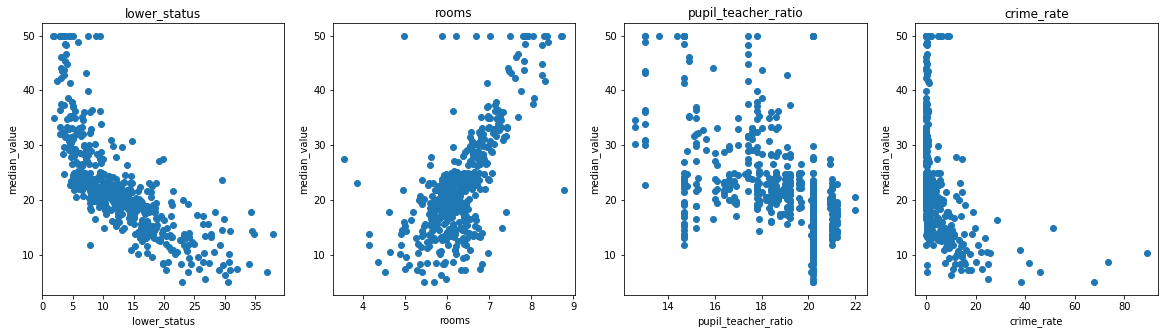

In [76]:
# set plot size
plt.figure(figsize=(20, 5))

# assign variables 
features = ['lower_status', 'rooms', 'pupil_teacher_ratio', 'crime_rate']
target = boston['median_value']

# plot each feature with target variable
for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('median_value')

### Overview of Correlation

Rooms, pupil_teacher_ratio, crime_rate and lower_status are highly correlated to the target variable median_value with values over 0.54. 

By looking at the correlation matrix we can see that rooms (average number of rooms per dwelling) has a strong positive correlation with median_value (0.7) where as lower_status (% lower status of the population) has a high negative correlation with median_value (-0.74). This makes sense as dwellings with more rooms are likely to be higher in value and where there is a lower status in the population it is likely that dwellings would be lower in value in that area. Also in areas where there are less schools and the pupil teacher ratio is higher we would expect that dwellings would be lower in value.

crime_rate is also negatively correlated with median_value - where the crime rate is higher house prices are lower.

The scatter plots visually show the relationships with the target variable and the high correlation whether negative or positive.

Large zones, charles river and distance are also postively correlated to the target variable. One would assume that houses by the river, more zoned area and distance to employment centres would increase the value of a house.

## Inferential Statistics

Inferential statistics allows predictions to be made from a dataset. They are produced by complex mathematical calculations and allow us to deduce trends and make assumptions and predictions about a population based on a study of a sample taken from it.
In this section inferential statistics will be used to analyse whether there is a significant difference in median house prices between houses that are along the Charles river and those that are not along the Charles river.
I will use the three variables that were found to be highly correlated with the median_value - lower_status, rooms and pupil_teacher_ratio and create scatter plots grouped by the charles_river variable. I will then complete an independent t-test on the data.

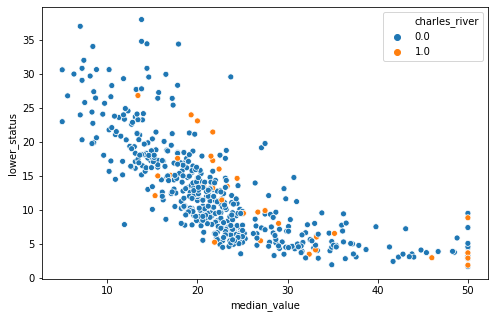

In [77]:
# set plot size
plt.figure(figsize=(8,5))

# create scatter plot
sns.scatterplot(data=boston,x='median_value',y='lower_status', hue='charles_river')

The above scatter plot shows that the higher the lower_status the lower the median_value but it does not give an indication as to whether houses bordering the charles river are higher in value.

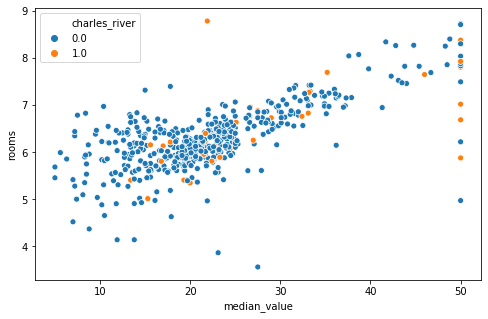

In [78]:
# set plot size
plt.figure(figsize=(8,5))

# create scatter plot
sns.scatterplot(data=boston,x='median_value',y='rooms', hue='charles_river')

Again it can be seen from the above scatter plot that as the number of rooms increase so does median_value. However, it is still not clear whether houses bordering the charles river are more expensive that those that aren't.

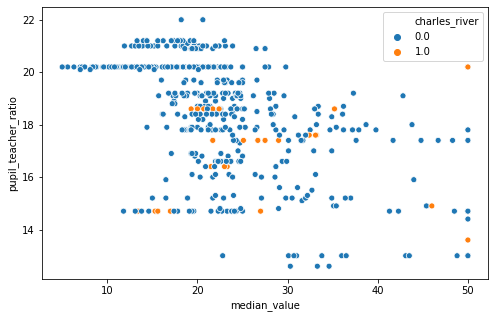

In [79]:
# set plot size
plt.figure(figsize=(8,5))

# create scatter plot
sns.scatterplot(data=boston,x='median_value',y='pupil_teacher_ratio', hue='charles_river')

Again this scatter plot shows the higher the pupil to teacher ratio the lower the value of the home but it does not indicate whether houses are higher in value on the charles river.

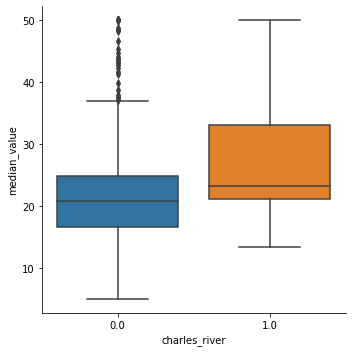

In [80]:
# create a boxplot grouped by charles_river
sns.catplot(data=boston,x='charles_river', y='median_value', kind='box')

The above boxplot diagram shows that houses on the charles river are higher in value that those that aren't. The houses not on the charles river have a median_value that is more widely spread and many outliers. The houses on the charles river have a distribution that is skewed right - the mean is greater than the median. It can also been seen by the descriptive statistics below that we are not working with the same count - 35 homes are bounded by charles river and 471 are not. It does show that the mean and median value is higher for houses bordering charles river.
It is still not clear that bordering the river will have a price benefit on it's own. This assumption can not be made on the diagrams alone.

In [81]:
# calculate an independent ttest on houses that bound the charles river and those that don't
import scipy.stats as ss
chas1=boston[boston['charles_river']==1]['median_value']
chas0=boston[boston['charles_river']==0]['median_value']
ss.ttest_ind(chas1, chas0)

Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)

In [82]:
# calculate descriptive statistics on houses that do not bound the charles river
chas0.describe()

count    471.000000
mean      22.093843
std        8.831362
min        5.000000
25%       16.600000
50%       20.900000
75%       24.800000
max       50.000000
Name: median_value, dtype: float64

In [83]:
# calculate descriptive statistics on houses that do not bound the charles river
chas1.describe()

count    35.000000
mean     28.440000
std      11.816643
min      13.400000
25%      21.100000
50%      23.300000
75%      33.150000
max      50.000000
Name: median_value, dtype: float64

### Observations

Null Hypothesis - is the assumption that the average value of the chas1 population (houses that bound the river) is equal to the average value of the chas0 population (houses that don't bound the river).

I set the significance level to 0.05% and conducted an independent t-test on the data.

As the pvalue is less than the significance level of 0.05% the null hypothesis is rejected. There is a significant difference and null hypothesis of equal averages is rejected for an alternative hypothesis.

It can therefore be claimed with certainty that there is a significant difference between house prices bordering the Charles river and those that are not bordering the Charles river.

# Neural Network

Keras is a high-level neural networks API, written in Python. This package will be used to develop a model to predict the median house price based on the other variables in the dataset.
 

### Prepare the Data for the Neural Network

A neural network requires the inputs and outputs to be defined. I defined two variables - inputs and output. The inputs variable contains the 13 variables in the dataset and the output variable is the target variable median_value.

In [84]:
# view first 5 rows of boston dataset
boston.head()

,crime_rate,large_zones,industrial,charles_river,nitric_oxide,rooms,old_houses,distance,highway_access,property_tax,pupil_teacher_ratio,proportion_blacks,lower_status,median_value
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [85]:
# create a new dataframe with the input variables for the neural network so I can remove and add as required for testing
inputs = boston[['crime_rate', 'large_zones', 'industrial', 'charles_river', 'nitric_oxide', 'rooms', 'old_houses', 'distance', 'highway_access', 'property_tax', 'pupil_teacher_ratio', 'proportion_blacks', 'lower_status']
]
inputs.head()

,crime_rate,large_zones,industrial,charles_river,nitric_oxide,rooms,old_houses,distance,highway_access,property_tax,pupil_teacher_ratio,proportion_blacks,lower_status
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


I used all 13 variables in the Boston dataset as inputs. I did try using fewer variables, ones which were highly correlated but this did not improve the performance of my neural network.

In [86]:
# create a new variable for the output from the neural network
output = boston['median_value']
output

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: median_value, Length: 506, dtype: float64

## Standardisation

The data in the Boson dataset is not standardized as the variables have different distributions. The normal distribution is one of the most important concepts in statistics since nearly all statistical tests and models require normally distributed data. As a result, the data in the Boston dataset should be standardized using the StandardScaler function in scikit-learn. This is a useful technique where the attributes are transformed to a standard gaussian distribution with a mean of 0 and a standard deviation of 1. Standardization is important when comparing variables that have different distributions as it prevents bias.

In [87]:
# import the library
import sklearn.preprocessing as pre

# standarize the inputs
pre.scale(inputs)
inputs_scale=pd.DataFrame(pre.scale(inputs), columns=inputs.columns)
inputs_scale

,crime_rate,large_zones,industrial,charles_river,nitric_oxide,rooms,old_houses,distance,highway_access,property_tax,pupil_teacher_ratio,proportion_blacks,lower_status
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.413229,-0.487722,0.115738,-0.272599,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-0.418147
502,-0.415249,-0.487722,0.115738,-0.272599,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.500850
503,-0.413447,-0.487722,0.115738,-0.272599,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.983048
504,-0.407764,-0.487722,0.115738,-0.272599,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.865302


In [88]:
# print the mean of each variable to 2 decimal places to check the standardisation has worked
inputs_scale.mean().round(2)

crime_rate            -0.0
large_zones            0.0
industrial             0.0
charles_river         -0.0
nitric_oxide          -0.0
rooms                 -0.0
old_houses            -0.0
distance               0.0
highway_access         0.0
property_tax          -0.0
pupil_teacher_ratio    0.0
proportion_blacks     -0.0
lower_status          -0.0
dtype: float64

It can be seen from running the code inputs_scale.mean().round(2) that the mean is now zero.

In [89]:
# print the standard deviation of each variable to 2 decimal places to check the standardisation has worked
inputs_scale.std().round(2)

crime_rate             1.0
large_zones            1.0
industrial             1.0
charles_river          1.0
nitric_oxide           1.0
rooms                  1.0
old_houses             1.0
distance               1.0
highway_access         1.0
property_tax           1.0
pupil_teacher_ratio    1.0
proportion_blacks      1.0
lower_status           1.0
dtype: float64

It can be seen from running the code inputs_scale.std().round(2) that the standard deviation is now one.

### Fitting and Transforming

The scaler.transform function will allow any new rows that are added to the dataset to be transformed or standardized in the same way as the rest of the dataset.

In [90]:
scaler = pre.StandardScaler()
scaler.fit(inputs)
scaler.mean_, scaler.scale_

(array([3.61352356e+00, 1.13636364e+01, 1.11367787e+01, 6.91699605e-02,
        5.54695059e-01, 6.28463439e+00, 6.85749012e+01, 3.79504269e+00,
        9.54940711e+00, 4.08237154e+02, 1.84555336e+01, 3.56674032e+02,
        1.26530632e+01]),
 array([8.59304135e+00, 2.32993957e+01, 6.85357058e+00, 2.53742935e-01,
        1.15763115e-01, 7.01922514e-01, 2.81210326e+01, 2.10362836e+00,
        8.69865112e+00, 1.68370495e+02, 2.16280519e+00, 9.12046075e+01,
        7.13400164e+00]))

In [91]:
# this allows us to transform any new values that are added to the dataset
inputs_scale = pd.DataFrame(scaler.transform(inputs), columns=inputs.columns)
inputs_scale

,crime_rate,large_zones,industrial,charles_river,nitric_oxide,rooms,old_houses,distance,highway_access,property_tax,pupil_teacher_ratio,proportion_blacks,lower_status
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.413229,-0.487722,0.115738,-0.272599,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-0.418147
502,-0.415249,-0.487722,0.115738,-0.272599,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.500850
503,-0.413447,-0.487722,0.115738,-0.272599,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.983048
504,-0.407764,-0.487722,0.115738,-0.272599,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.865302


### Split the Data into Train and Test Data

The neural network train-test technique is a process used to reduce model over fitting. The data, which has input and output values, is split into a training set (typically 80 percent of the data) and a test set (the remaining 20 percent). I tried using this technique to improve the performance of my neural network but it had no effect. I returned to a non train-test technique.

In [92]:
# split the data into train and test data
inputs_scale_train, inputs_scale_test, output_train, output_test = mod.train_test_split(inputs_scale, output, test_size=0.2)

## Create the Neural Network Model

Now that the input variables have been standardized I can now build the neural network. I will use a sequential model.

I built a model with two hidden layers, with 128 and 64 neurons respectively with a ReLU activation function. The final output layer uses a linear activation function as we are outputting a single variable. I used the Adam optimizer mean squared error loss function and "mean absolute percentage error" as the metric for validation.Through research the Adam optimizer is extremely good.

The whole process of training the data will be in batches of 10 and will be repeated 2000 times. At the end of each epoch, the model will comput and print the performance metrics.

The model design took a lot of trial and error. I tested a number of different models but found that this design performed the best. 

Epoch 1/2000
506/506 [==============================] - 3s 5ms/step - loss: 470.5597 - mean_absolute_percentage_error: 85.5611
Epoch 2/2000
506/506 [==============================] - 0s 447us/step - loss: 109.9370 - mean_absolute_percentage_error: 36.8913
Epoch 3/2000
506/506 [==============================] - 0s 615us/step - loss: 33.2516 - mean_absolute_percentage_error: 22.9611
Epoch 4/2000
506/506 [==============================] - 0s 474us/step - loss: 23.0489 - mean_absolute_percentage_error: 18.0433
Epoch 5/2000
506/506 [==============================] - 0s 506us/step - loss: 20.1507 - mean_absolute_percentage_error: 16.1853
Epoch 6/2000
506/506 [==============================] - 0s 496us/step - loss: 17.9266 - mean_absolute_percentage_error: 15.3075
Epoch 7/2000
506/506 [==============================] - 0s 591us/step - loss: 16.4330 - mean_absolute_percentage_error: 14.2848
Epoch 8/2000
506/506 [==============================] - 0s 684us/step - loss: 15.7646 - mean_absolute_pe

506/506 [==============================] - 0s 514us/step - loss: 5.2947 - mean_absolute_percentage_error: 8.5821
Epoch 66/2000
506/506 [==============================] - 0s 431us/step - loss: 4.8606 - mean_absolute_percentage_error: 7.9754
Epoch 67/2000
506/506 [==============================] - 0s 433us/step - loss: 4.9364 - mean_absolute_percentage_error: 8.1785
Epoch 68/2000
506/506 [==============================] - 0s 514us/step - loss: 4.7982 - mean_absolute_percentage_error: 8.0679
Epoch 69/2000
506/506 [==============================] - 0s 480us/step - loss: 4.7433 - mean_absolute_percentage_error: 8.2713
Epoch 70/2000
506/506 [==============================] - 0s 474us/step - loss: 4.6801 - mean_absolute_percentage_error: 8.1613
Epoch 71/2000
506/506 [==============================] - 0s 453us/step - loss: 4.4052 - mean_absolute_percentage_error: 7.5428
Epoch 72/2000
506/506 [==============================] - 0s 567us/step - loss: 4.4739 - mean_absolute_percentage_error: 7.752

506/506 [==============================] - 0s 461us/step - loss: 2.9372 - mean_absolute_percentage_error: 6.3213
Epoch 129/2000
506/506 [==============================] - 0s 486us/step - loss: 2.9349 - mean_absolute_percentage_error: 6.3173
Epoch 130/2000
506/506 [==============================] - 0s 552us/step - loss: 2.8106 - mean_absolute_percentage_error: 6.4826
Epoch 131/2000
506/506 [==============================] - 0s 385us/step - loss: 3.0394 - mean_absolute_percentage_error: 6.7529
Epoch 132/2000
506/506 [==============================] - 0s 378us/step - loss: 2.8133 - mean_absolute_percentage_error: 6.1648
Epoch 133/2000
506/506 [==============================] - 0s 389us/step - loss: 2.6131 - mean_absolute_percentage_error: 5.9444
Epoch 134/2000
506/506 [==============================] - 0s 476us/step - loss: 2.5732 - mean_absolute_percentage_error: 5.9703
Epoch 135/2000
506/506 [==============================] - 0s 508us/step - loss: 2.5442 - mean_absolute_percentage_error

506/506 [==============================] - 0s 868us/step - loss: 1.8588 - mean_absolute_percentage_error: 5.19210s - loss: 1.8262 - mean_absolute_percentage_e
Epoch 192/2000
506/506 [==============================] - 0s 664us/step - loss: 1.7354 - mean_absolute_percentage_error: 4.9246
Epoch 193/2000
506/506 [==============================] - 0s 544us/step - loss: 2.0129 - mean_absolute_percentage_error: 5.1862
Epoch 194/2000
506/506 [==============================] - 0s 508us/step - loss: 1.9854 - mean_absolute_percentage_error: 5.5373
Epoch 195/2000
506/506 [==============================] - 0s 407us/step - loss: 1.7436 - mean_absolute_percentage_error: 4.8905
Epoch 196/2000
506/506 [==============================] - 0s 382us/step - loss: 1.8568 - mean_absolute_percentage_error: 4.9359
Epoch 197/2000
506/506 [==============================] - 0s 387us/step - loss: 1.8010 - mean_absolute_percentage_error: 4.9931
Epoch 198/2000
506/506 [==============================] - 0s 518us/step -

506/506 [==============================] - 0s 401us/step - loss: 1.2984 - mean_absolute_percentage_error: 4.2882
Epoch 255/2000
506/506 [==============================] - 0s 407us/step - loss: 1.3124 - mean_absolute_percentage_error: 4.2478
Epoch 256/2000
506/506 [==============================] - 0s 387us/step - loss: 1.3133 - mean_absolute_percentage_error: 4.3782
Epoch 257/2000
506/506 [==============================] - 0s 397us/step - loss: 1.4664 - mean_absolute_percentage_error: 4.7582
Epoch 258/2000
506/506 [==============================] - 0s 354us/step - loss: 1.2399 - mean_absolute_percentage_error: 3.9760
Epoch 259/2000
506/506 [==============================] - 0s 467us/step - loss: 1.3554 - mean_absolute_percentage_error: 4.1907
Epoch 260/2000
506/506 [==============================] - 0s 463us/step - loss: 1.1563 - mean_absolute_percentage_error: 3.9174
Epoch 261/2000
506/506 [==============================] - 0s 478us/step - loss: 1.2814 - mean_absolute_percentage_error

506/506 [==============================] - 0s 514us/step - loss: 0.9425 - mean_absolute_percentage_error: 3.7286
Epoch 318/2000
506/506 [==============================] - 0s 457us/step - loss: 0.9799 - mean_absolute_percentage_error: 3.6197
Epoch 319/2000
506/506 [==============================] - 0s 405us/step - loss: 0.9778 - mean_absolute_percentage_error: 3.5482
Epoch 320/2000
506/506 [==============================] - 0s 387us/step - loss: 1.0083 - mean_absolute_percentage_error: 3.8260
Epoch 321/2000
506/506 [==============================] - 0s 385us/step - loss: 0.8714 - mean_absolute_percentage_error: 3.2846
Epoch 322/2000
506/506 [==============================] - 0s 478us/step - loss: 1.0797 - mean_absolute_percentage_error: 3.8680
Epoch 323/2000
506/506 [==============================] - 0s 494us/step - loss: 1.0792 - mean_absolute_percentage_error: 4.1451
Epoch 324/2000
506/506 [==============================] - 0s 506us/step - loss: 1.0627 - mean_absolute_percentage_error

506/506 [==============================] - 0s 583us/step - loss: 0.7701 - mean_absolute_percentage_error: 3.1787
Epoch 381/2000
506/506 [==============================] - 0s 423us/step - loss: 0.8769 - mean_absolute_percentage_error: 3.5619
Epoch 382/2000
506/506 [==============================] - 0s 380us/step - loss: 0.8418 - mean_absolute_percentage_error: 3.4001
Epoch 383/2000
506/506 [==============================] - 0s 376us/step - loss: 0.7623 - mean_absolute_percentage_error: 2.9733
Epoch 384/2000
506/506 [==============================] - 0s 463us/step - loss: 0.7081 - mean_absolute_percentage_error: 2.9169
Epoch 385/2000
506/506 [==============================] - 0s 510us/step - loss: 0.7612 - mean_absolute_percentage_error: 3.2274
Epoch 386/2000
506/506 [==============================] - 0s 496us/step - loss: 0.7797 - mean_absolute_percentage_error: 3.1674
Epoch 387/2000
506/506 [==============================] - 0s 469us/step - loss: 0.7732 - mean_absolute_percentage_error

506/506 [==============================] - 0s 680us/step - loss: 0.7165 - mean_absolute_percentage_error: 3.0846
Epoch 444/2000
506/506 [==============================] - 0s 453us/step - loss: 0.7764 - mean_absolute_percentage_error: 3.2552
Epoch 445/2000
506/506 [==============================] - 0s 640us/step - loss: 0.7007 - mean_absolute_percentage_error: 3.17780s - loss: 0.7039 - mean_absolute_percentage_err
Epoch 446/2000
506/506 [==============================] - 0s 933us/step - loss: 0.6729 - mean_absolute_percentage_error: 3.03770s - loss: 0.6726 - mean_absolute_percenta
Epoch 447/2000
506/506 [==============================] - 0s 698us/step - loss: 0.5952 - mean_absolute_percentage_error: 2.7318
Epoch 448/2000
506/506 [==============================] - 0s 725us/step - loss: 0.5632 - mean_absolute_percentage_error: 2.6926
Epoch 449/2000
506/506 [==============================] - 0s 767us/step - loss: 0.6122 - mean_absolute_percentage_error: 2.8280
Epoch 450/2000
506/506 [=====

506/506 [==============================] - 0s 731us/step - loss: 0.6675 - mean_absolute_percentage_error: 2.9956
Epoch 507/2000
506/506 [==============================] - 0s 522us/step - loss: 0.4945 - mean_absolute_percentage_error: 2.4417
Epoch 508/2000
506/506 [==============================] - 0s 380us/step - loss: 0.6966 - mean_absolute_percentage_error: 2.9441
Epoch 509/2000
506/506 [==============================] - 0s 510us/step - loss: 0.6069 - mean_absolute_percentage_error: 2.8911
Epoch 510/2000
506/506 [==============================] - 0s 593us/step - loss: 0.5391 - mean_absolute_percentage_error: 2.7475
Epoch 511/2000
506/506 [==============================] - 0s 500us/step - loss: 0.4701 - mean_absolute_percentage_error: 2.5209
Epoch 512/2000
506/506 [==============================] - 0s 569us/step - loss: 0.6076 - mean_absolute_percentage_error: 2.8308
Epoch 513/2000
506/506 [==============================] - 0s 830us/step - loss: 0.7808 - mean_absolute_percentage_error

506/506 [==============================] - 0s 642us/step - loss: 0.4691 - mean_absolute_percentage_error: 2.4105
Epoch 569/2000
506/506 [==============================] - 0s 546us/step - loss: 0.4921 - mean_absolute_percentage_error: 2.4441
Epoch 570/2000
506/506 [==============================] - 0s 674us/step - loss: 0.5903 - mean_absolute_percentage_error: 2.7804
Epoch 571/2000
506/506 [==============================] - 0s 621us/step - loss: 0.4931 - mean_absolute_percentage_error: 2.5961
Epoch 572/2000
506/506 [==============================] - 0s 609us/step - loss: 0.4701 - mean_absolute_percentage_error: 2.7277
Epoch 573/2000
506/506 [==============================] - 0s 459us/step - loss: 0.4908 - mean_absolute_percentage_error: 2.5216
Epoch 574/2000
506/506 [==============================] - 0s 670us/step - loss: 0.4647 - mean_absolute_percentage_error: 2.6398
Epoch 575/2000
506/506 [==============================] - 0s 555us/step - loss: 0.5159 - mean_absolute_percentage_error

506/506 [==============================] - 0s 639us/step - loss: 0.3939 - mean_absolute_percentage_error: 2.4336
Epoch 632/2000
506/506 [==============================] - 0s 482us/step - loss: 0.3380 - mean_absolute_percentage_error: 2.1146
Epoch 633/2000
506/506 [==============================] - 0s 486us/step - loss: 0.4284 - mean_absolute_percentage_error: 2.2874
Epoch 634/2000
506/506 [==============================] - 0s 757us/step - loss: 0.3734 - mean_absolute_percentage_error: 2.2935
Epoch 635/2000
506/506 [==============================] - 0s 894us/step - loss: 0.5407 - mean_absolute_percentage_error: 2.6633
Epoch 636/2000
506/506 [==============================] - 0s 557us/step - loss: 0.3955 - mean_absolute_percentage_error: 2.2484
Epoch 637/2000
506/506 [==============================] - 0s 548us/step - loss: 0.4190 - mean_absolute_percentage_error: 2.5095
Epoch 638/2000
506/506 [==============================] - 0s 702us/step - loss: 0.5290 - mean_absolute_percentage_error

506/506 [==============================] - 0s 652us/step - loss: 0.3275 - mean_absolute_percentage_error: 2.0791
Epoch 694/2000
506/506 [==============================] - 0s 731us/step - loss: 0.3377 - mean_absolute_percentage_error: 2.1467
Epoch 695/2000
506/506 [==============================] - 0s 658us/step - loss: 0.3291 - mean_absolute_percentage_error: 2.2369
Epoch 696/2000
506/506 [==============================] - 0s 840us/step - loss: 0.2716 - mean_absolute_percentage_error: 1.8927
Epoch 697/2000
506/506 [==============================] - 0s 510us/step - loss: 0.2804 - mean_absolute_percentage_error: 1.8546
Epoch 698/2000
506/506 [==============================] - 0s 387us/step - loss: 0.2420 - mean_absolute_percentage_error: 1.7848
Epoch 699/2000
506/506 [==============================] - 0s 587us/step - loss: 0.3351 - mean_absolute_percentage_error: 2.1659
Epoch 700/2000
506/506 [==============================] - 0s 559us/step - loss: 0.3608 - mean_absolute_percentage_error

506/506 [==============================] - 0s 267us/step - loss: 0.2404 - mean_absolute_percentage_error: 1.9305
Epoch 757/2000
506/506 [==============================] - 0s 261us/step - loss: 0.2675 - mean_absolute_percentage_error: 1.8687
Epoch 758/2000
506/506 [==============================] - 0s 265us/step - loss: 0.3505 - mean_absolute_percentage_error: 2.2015
Epoch 759/2000
506/506 [==============================] - 0s 308us/step - loss: 0.3136 - mean_absolute_percentage_error: 2.1548
Epoch 760/2000
506/506 [==============================] - 0s 358us/step - loss: 0.2512 - mean_absolute_percentage_error: 1.9167
Epoch 761/2000
506/506 [==============================] - 0s 354us/step - loss: 0.2650 - mean_absolute_percentage_error: 1.9710
Epoch 762/2000
506/506 [==============================] - 0s 287us/step - loss: 0.3706 - mean_absolute_percentage_error: 2.2721
Epoch 763/2000
506/506 [==============================] - 0s 421us/step - loss: 0.4035 - mean_absolute_percentage_error

506/506 [==============================] - 0s 251us/step - loss: 0.3537 - mean_absolute_percentage_error: 2.4826
Epoch 821/2000
506/506 [==============================] - 0s 261us/step - loss: 0.3458 - mean_absolute_percentage_error: 2.2780
Epoch 822/2000
506/506 [==============================] - 0s 298us/step - loss: 0.2275 - mean_absolute_percentage_error: 1.7117
Epoch 823/2000
506/506 [==============================] - 0s 281us/step - loss: 0.1980 - mean_absolute_percentage_error: 1.5914
Epoch 824/2000
506/506 [==============================] - 0s 340us/step - loss: 0.1420 - mean_absolute_percentage_error: 1.3576
Epoch 825/2000
506/506 [==============================] - 0s 368us/step - loss: 0.1998 - mean_absolute_percentage_error: 1.6756
Epoch 826/2000
506/506 [==============================] - ETA: 0s - loss: 0.2369 - mean_absolute_percentage_error: 1.88 - 0s 334us/step - loss: 0.2343 - mean_absolute_percentage_error: 1.8846
Epoch 827/2000
506/506 [==============================]

506/506 [==============================] - 0s 919us/step - loss: 0.2744 - mean_absolute_percentage_error: 1.9524
Epoch 883/2000
506/506 [==============================] - 0s 526us/step - loss: 0.2370 - mean_absolute_percentage_error: 1.7425
Epoch 884/2000
506/506 [==============================] - 0s 332us/step - loss: 0.2192 - mean_absolute_percentage_error: 1.8281
Epoch 885/2000
506/506 [==============================] - 0s 287us/step - loss: 0.3176 - mean_absolute_percentage_error: 2.1242
Epoch 886/2000
506/506 [==============================] - 0s 271us/step - loss: 0.3555 - mean_absolute_percentage_error: 2.3145
Epoch 887/2000
506/506 [==============================] - 0s 304us/step - loss: 0.2241 - mean_absolute_percentage_error: 1.9411
Epoch 888/2000
506/506 [==============================] - 0s 253us/step - loss: 0.2008 - mean_absolute_percentage_error: 1.6738
Epoch 889/2000
506/506 [==============================] - 0s 253us/step - loss: 0.2886 - mean_absolute_percentage_error

506/506 [==============================] - 0s 302us/step - loss: 0.2036 - mean_absolute_percentage_error: 1.6610
Epoch 1487/2000
506/506 [==============================] - 0s 293us/step - loss: 0.1364 - mean_absolute_percentage_error: 1.3890
Epoch 1488/2000
506/506 [==============================] - 0s 289us/step - loss: 0.0969 - mean_absolute_percentage_error: 1.1549
Epoch 1489/2000
506/506 [==============================] - 0s 297us/step - loss: 0.1306 - mean_absolute_percentage_error: 1.3503
Epoch 1490/2000
506/506 [==============================] - 0s 320us/step - loss: 0.1533 - mean_absolute_percentage_error: 1.4430
Epoch 1491/2000
506/506 [==============================] - 0s 295us/step - loss: 0.1828 - mean_absolute_percentage_error: 1.6014
Epoch 1492/2000
506/506 [==============================] - 0s 322us/step - loss: 0.1566 - mean_absolute_percentage_error: 1.5302
Epoch 1493/2000
506/506 [==============================] - 0s 285us/step - loss: 0.1657 - mean_absolute_percentag

506/506 [==============================] - 0s 275us/step - loss: 0.1185 - mean_absolute_percentage_error: 1.3092
Epoch 1550/2000
506/506 [==============================] - 0s 342us/step - loss: 0.1365 - mean_absolute_percentage_error: 1.4683
Epoch 1551/2000
506/506 [==============================] - 0s 285us/step - loss: 0.1633 - mean_absolute_percentage_error: 1.6179
Epoch 1552/2000
506/506 [==============================] - 0s 302us/step - loss: 0.1103 - mean_absolute_percentage_error: 1.3592
Epoch 1553/2000
506/506 [==============================] - 0s 382us/step - loss: 0.1177 - mean_absolute_percentage_error: 1.3760
Epoch 1554/2000
506/506 [==============================] - 0s 293us/step - loss: 0.0916 - mean_absolute_percentage_error: 1.2066
Epoch 1555/2000
506/506 [==============================] - 0s 382us/step - loss: 0.0687 - mean_absolute_percentage_error: 1.0287
Epoch 1556/2000
506/506 [==============================] - 0s 291us/step - loss: 0.0619 - mean_absolute_percentag

506/506 [==============================] - 0s 291us/step - loss: 0.2057 - mean_absolute_percentage_error: 1.8102
Epoch 1612/2000
506/506 [==============================] - 0s 295us/step - loss: 0.1753 - mean_absolute_percentage_error: 1.5610
Epoch 1613/2000
506/506 [==============================] - 0s 277us/step - loss: 0.1282 - mean_absolute_percentage_error: 1.4196
Epoch 1614/2000
506/506 [==============================] - 0s 297us/step - loss: 0.1042 - mean_absolute_percentage_error: 1.2733
Epoch 1615/2000
506/506 [==============================] - 0s 283us/step - loss: 0.0983 - mean_absolute_percentage_error: 1.2739
Epoch 1616/2000
506/506 [==============================] - 0s 283us/step - loss: 0.0876 - mean_absolute_percentage_error: 1.2070
Epoch 1617/2000
506/506 [==============================] - 0s 283us/step - loss: 0.0908 - mean_absolute_percentage_error: 1.1888
Epoch 1618/2000
506/506 [==============================] - 0s 304us/step - loss: 0.1085 - mean_absolute_percentag

506/506 [==============================] - 0s 237us/step - loss: 0.0947 - mean_absolute_percentage_error: 1.1552
Epoch 1675/2000
506/506 [==============================] - 0s 235us/step - loss: 0.0984 - mean_absolute_percentage_error: 1.2336
Epoch 1676/2000
506/506 [==============================] - 0s 239us/step - loss: 0.1100 - mean_absolute_percentage_error: 1.1502
Epoch 1677/2000
506/506 [==============================] - 0s 241us/step - loss: 0.0868 - mean_absolute_percentage_error: 1.1049
Epoch 1678/2000
506/506 [==============================] - 0s 275us/step - loss: 0.1096 - mean_absolute_percentage_error: 1.2924
Epoch 1679/2000
506/506 [==============================] - 0s 368us/step - loss: 0.0886 - mean_absolute_percentage_error: 1.1770
Epoch 1680/2000
506/506 [==============================] - 0s 362us/step - loss: 0.1324 - mean_absolute_percentage_error: 1.3466
Epoch 1681/2000
506/506 [==============================] - 0s 235us/step - loss: 0.2118 - mean_absolute_percentag

506/506 [==============================] - 0s 368us/step - loss: 0.1870 - mean_absolute_percentage_error: 1.7785
Epoch 1738/2000
506/506 [==============================] - 0s 356us/step - loss: 0.2532 - mean_absolute_percentage_error: 2.1087
Epoch 1739/2000
506/506 [==============================] - 0s 328us/step - loss: 0.1701 - mean_absolute_percentage_error: 1.6577
Epoch 1740/2000
506/506 [==============================] - 0s 269us/step - loss: 0.1272 - mean_absolute_percentage_error: 1.4554
Epoch 1741/2000
506/506 [==============================] - 0s 283us/step - loss: 0.1311 - mean_absolute_percentage_error: 1.3917
Epoch 1742/2000
506/506 [==============================] - 0s 277us/step - loss: 0.1196 - mean_absolute_percentage_error: 1.3618
Epoch 1743/2000
506/506 [==============================] - 0s 295us/step - loss: 0.1233 - mean_absolute_percentage_error: 1.4156
Epoch 1744/2000
506/506 [==============================] - 0s 273us/step - loss: 0.0934 - mean_absolute_percentag

506/506 [==============================] - 0s 249us/step - loss: 0.3273 - mean_absolute_percentage_error: 2.2555
Epoch 1801/2000
506/506 [==============================] - 0s 249us/step - loss: 0.2108 - mean_absolute_percentage_error: 1.7834
Epoch 1802/2000
506/506 [==============================] - 0s 239us/step - loss: 0.1116 - mean_absolute_percentage_error: 1.3445
Epoch 1803/2000
506/506 [==============================] - 0s 263us/step - loss: 0.1803 - mean_absolute_percentage_error: 1.5745
Epoch 1804/2000
506/506 [==============================] - 0s 285us/step - loss: 0.1537 - mean_absolute_percentage_error: 1.5077
Epoch 1805/2000
506/506 [==============================] - 0s 476us/step - loss: 0.1291 - mean_absolute_percentage_error: 1.4300
Epoch 1806/2000
506/506 [==============================] - 0s 281us/step - loss: 0.1565 - mean_absolute_percentage_error: 1.5676
Epoch 1807/2000
506/506 [==============================] - 0s 249us/step - loss: 0.1448 - mean_absolute_percentag

506/506 [==============================] - 0s 298us/step - loss: 0.0971 - mean_absolute_percentage_error: 1.1798
Epoch 1864/2000
506/506 [==============================] - 0s 279us/step - loss: 0.2079 - mean_absolute_percentage_error: 1.6875
Epoch 1865/2000
506/506 [==============================] - 0s 279us/step - loss: 0.1918 - mean_absolute_percentage_error: 1.6923
Epoch 1866/2000
506/506 [==============================] - 0s 354us/step - loss: 0.2047 - mean_absolute_percentage_error: 1.7282
Epoch 1867/2000
506/506 [==============================] - 0s 289us/step - loss: 0.2336 - mean_absolute_percentage_error: 1.8531
Epoch 1868/2000
506/506 [==============================] - 0s 287us/step - loss: 0.2358 - mean_absolute_percentage_error: 1.9382
Epoch 1869/2000
506/506 [==============================] - 0s 291us/step - loss: 0.2036 - mean_absolute_percentage_error: 1.8424
Epoch 1870/2000
506/506 [==============================] - 0s 291us/step - loss: 0.1983 - mean_absolute_percentag

506/506 [==============================] - 0s 285us/step - loss: 0.1248 - mean_absolute_percentage_error: 1.3867
Epoch 1927/2000
506/506 [==============================] - 0s 269us/step - loss: 0.1467 - mean_absolute_percentage_error: 1.5510
Epoch 1928/2000
506/506 [==============================] - 0s 300us/step - loss: 0.1665 - mean_absolute_percentage_error: 1.5223
Epoch 1929/2000
506/506 [==============================] - 0s 298us/step - loss: 0.2359 - mean_absolute_percentage_error: 1.7929
Epoch 1930/2000
506/506 [==============================] - 0s 285us/step - loss: 0.1900 - mean_absolute_percentage_error: 1.5810
Epoch 1931/2000
506/506 [==============================] - 0s 289us/step - loss: 0.1590 - mean_absolute_percentage_error: 1.5559
Epoch 1932/2000
506/506 [==============================] - 0s 289us/step - loss: 0.1252 - mean_absolute_percentage_error: 1.3361
Epoch 1933/2000
506/506 [==============================] - 0s 279us/step - loss: 0.1656 - mean_absolute_percentag

506/506 [==============================] - 0s 275us/step - loss: 0.1587 - mean_absolute_percentage_error: 1.6196
Epoch 1990/2000
506/506 [==============================] - 0s 273us/step - loss: 0.1733 - mean_absolute_percentage_error: 1.5807
Epoch 1991/2000
506/506 [==============================] - 0s 255us/step - loss: 0.2881 - mean_absolute_percentage_error: 2.2601
Epoch 1992/2000
506/506 [==============================] - 0s 235us/step - loss: 0.3710 - mean_absolute_percentage_error: 2.2839
Epoch 1993/2000
506/506 [==============================] - 0s 233us/step - loss: 0.2243 - mean_absolute_percentage_error: 1.8339
Epoch 1994/2000
506/506 [==============================] - 0s 241us/step - loss: 0.2257 - mean_absolute_percentage_error: 1.9445
Epoch 1995/2000
506/506 [==============================] - 0s 241us/step - loss: 0.1249 - mean_absolute_percentage_error: 1.3793
Epoch 1996/2000
506/506 [==============================] - 0s 257us/step - loss: 0.0908 - mean_absolute_percentag

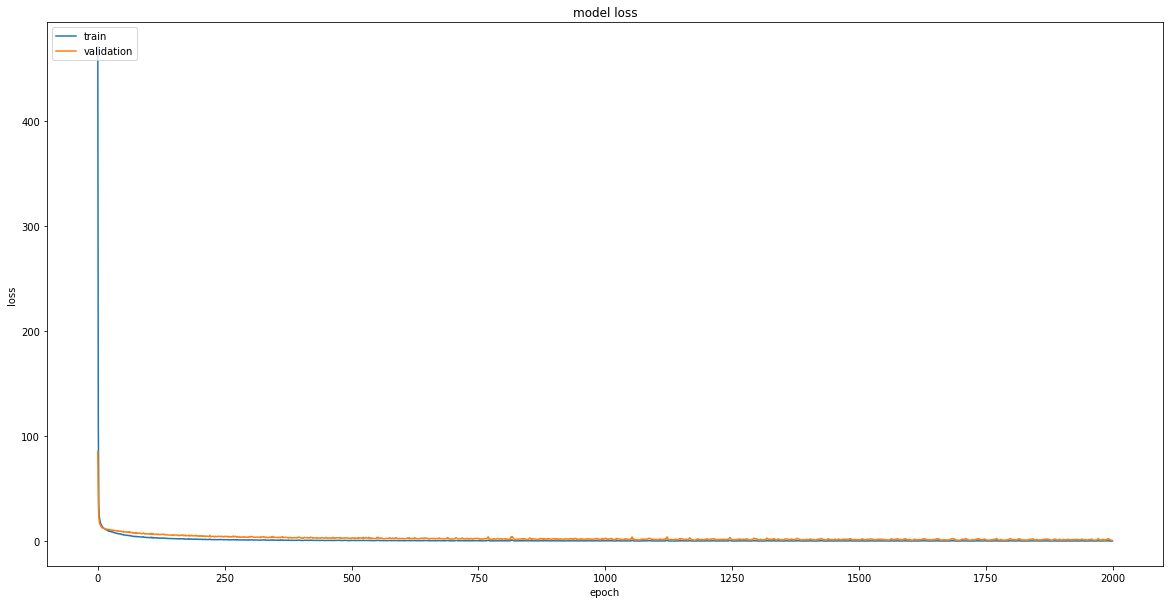

In [93]:
# import keras
import keras as kr

# Create a new neural network
m = kr.models.Sequential()

# Add a hidden layer with 128 neurons and an input layer with 13
m.add(kr.layers.Dense(128, input_dim=13, activation="relu"))
# Add a hidden layer with 64 neurons
m.add(kr.layers.Dense(64, activation="relu"))
# Add a one neuron output layer
m.add(kr.layers.Dense(1, activation="linear"))

# Compile the model
m.compile(loss="mean_squared_error", optimizer="adam", metrics=['mean_absolute_percentage_error'])

# Train the model
#history = m.fit(inputs_scale_train, output_train, epochs=2000, batch_size=10)
history = m.fit(inputs_scale, output, epochs=2000, batch_size=10)

print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['mean_absolute_percentage_error'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [94]:
# predicted outputs of neural network
np.round(m.predict(inputs_scale).T)

array([[24., 22., 35., 34., 36., 29., 23., 27., 17., 19., 15., 19., 22.,
        20., 18., 20., 23., 18., 20., 18., 14., 20., 15., 15., 16., 14.,
        17., 15., 18., 21., 13., 15., 13., 13., 13., 19., 20., 21., 25.,
        31., 35., 27., 25., 25., 21., 19., 20., 17., 14., 19., 20., 21.,
        25., 24., 19., 36., 25., 32., 24., 20., 19., 16., 22., 25., 33.,
        24., 19., 22., 17., 21., 24., 22., 23., 23., 24., 21., 20., 21.,
        21., 20., 28., 24., 25., 23., 24., 27., 23., 22., 24., 29., 23.,
        22., 23., 25., 21., 28., 21., 39., 44., 33., 27., 27., 19., 19.,
        20., 20., 19., 20., 20., 19., 22., 23., 19., 19., 19., 18., 21.,
        19., 20., 19., 22., 20., 20., 17., 19., 21., 16., 16., 18., 14.,
        19., 20., 23., 18., 16., 18., 17., 17., 13., 18., 14., 14., 13.,
        15., 12., 14., 15., 14., 18., 15., 21., 19., 15., 19., 17., 16.,
        13., 42., 24., 23., 26., 50., 50., 50., 23., 25., 50., 24., 24.,
        22., 17., 19., 23., 24., 23., 30., 23., 25.

In [95]:
# evaluate the model
m.evaluate(inputs_scale, output)

506/506 [==============================] - 0s 658us/step


[0.028868587636075943, 0.6134234666824341]

In [96]:
# calculate how many of the predictions are correct
(np.round(m.predict(inputs_scale).T) == np.round(output.as_matrix())).sum()

C:\Users\Rebecca\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


432

The number of predicted outputs that are correct are 432. 432 correct predictions out of 506 is not a great result but is the best result I have achieved.

In [89]:
# actual outputs for median_value
np.round(output.as_matrix())

C:\Users\Rebecca\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


array([24., 22., 35., 33., 36., 29., 23., 27., 16., 19., 15., 19., 22.,
       20., 18., 20., 23., 18., 20., 18., 14., 20., 15., 14., 16., 14.,
       17., 15., 18., 21., 13., 14., 13., 13., 14., 19., 20., 21., 25.,
       31., 35., 27., 25., 25., 21., 19., 20., 17., 14., 19., 20., 20.,
       25., 23., 19., 35., 25., 32., 23., 20., 19., 16., 22., 25., 33.,
       24., 19., 22., 17., 21., 24., 22., 23., 23., 24., 21., 20., 21.,
       21., 20., 28., 24., 25., 23., 24., 27., 22., 22., 24., 29., 23.,
       22., 23., 25., 21., 28., 21., 39., 44., 33., 28., 26., 19., 19.,
       20., 20., 20., 20., 20., 19., 22., 23., 19., 19., 18., 18., 21.,
       19., 20., 19., 22., 20., 20., 17., 19., 21., 16., 16., 18., 14.,
       19., 20., 23., 18., 16., 18., 17., 17., 13., 18., 14., 14., 13.,
       16., 12., 14., 16., 15., 18., 15., 22., 20., 15., 19., 17., 16.,
       13., 41., 24., 23., 27., 50., 50., 50., 23., 25., 50., 24., 24.,
       22., 17., 19., 23., 24., 23., 29., 23., 25., 30., 37., 40

In [90]:
# calculate the mean squared error which is the difference between the neural network prediction 
# and the actual outputs
np.sqrt(np.sum(m.predict(inputs_scale).T - output.as_matrix())**2)

C:\Users\Rebecca\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


4.741195774078383

## Conclusion

- The neural network did not perform as well when I split the data into training and test data.
- The neural network's performance did not improve when I reduced the number of inputs to only those that were highly correlated with median_value. This was a surprise as I thought fewer inputs which were highly correlated would improve the efficiency of the model.
- Standardization improved the performance of the neural network. This makes sense as a neural network prefers data that is   normally distributed.
- The 'relu' activation performed the best on the hidden layers. I tried various others including sigma, tanh and linear.
- Increasing the epochs to 2000 improved the performance of the neural network. The model managed to correctly predict 432 outputs.
- Creating the neural network and improving performance felt like pot luck rather than a science. I feel I would need  to  spend a lot more time researching and experimenting on different datasets before I would have the expertise in this area.

# References

https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155

http://www.datasciencemadesimple.com/descriptive-summary-statistics-python-pandas/

https://keras.io/

https://www.tensorflow.org/

http://prisoft.com/data-analysis-in-python-using-the-boston-housing-dataset/

https://gogul.dev/software/regression-example-boston-housing-prices

https://cmdlinetips.com/2018/03/how-to-change-column-names-and-row-indexes-in-pandas/

https://www.researchgate.net/post/Is_Pearsons_Correlation_coefficient_appropriate_for_non-normal_data


